# Demo of Surrogate Time Series Data Transform

2/13/19: In time series analysis, we are interested in getting a surrogate data distribution, so that our analysis can have some hypothesis testing capabilities wrt an empirical null distribution. This null distribution however, is difficult to compute.

In surrogate analysis with amplitude-adjusted Fourier transform, we maintain the power spectrum of the data, as well as the distribution of amplitudes.

I demo how we take this using methods published in the mid 2000s.

### Process of a multivariate time-series 
$$x_i = f(s_i)$$

Properties:
1. A(x) is the empirical amplitude distribution
2. R(x) is the autocorrelation of the data

Here, we are interested in the underlying processes that define our observed $x_i$. In EEG, that is the "underlying state" time series.

<img src="./figures/example_coherence_analysis_surrogate.png">

## 0. Shuffled
Perform random shuffling.

Properties:
1. Maintains distribution of amplitudes (i.e. $x_i$)

### 0b. Permutation Cluster Statistic
Comparing trials of two experimental conditions. D is a random variable (e.g. EEG for one trial).

Null hypothesis:
All n probability distributions are equal f(D), regardless of experimental condition.

1. Randomly draw trials from combined dataset -> form 2 subsets
2. Calculate test statistic on random partition
3. Repeat 1-2 many times for a distribution of the test statistic
4. Calculate p-value

Assumes:
1. Exchangeability of the D r.v. across trials/events. (autocorrelation though)

## 1. Amplitude Adjusted Fourier Transform (AAFT)
Setup with some time series: 

Assumes f is monotonic function.

1. Simulate first $f^{-1}$, by reordering white noise data to have same rank structure as $x$
2. make randomized copy using a FT surrogate, $y^{FT}$
3. and then transform it back to $f$. -> reorder $x$ to have same rank strcuture as $y^{FT}$

## 2. Iterative AAFT (IAAFT)

0. Start with random permutation, $z_0$, of the data $x$
1. Bring power spectrum of $z_i$ to that of $x$
2. Regain identical empirical amplitude distribution.

## 3. Digitally Filtered Surrogate (DFS) Algorithm

0. Estimate power spectra using overlapping FT (e.g. Welch's method). Demean the data
1. Take square root of power spectrum estimate and it's inverse FT = response function
2. Make random permutaiton of data (shuffled surrogate) and demean it.
3. Digital filter shuffled surrogate with response function by convolution.
4. Rescale filtered surrogate to original data distribution (same as AAFT procedure)

Properties:
1. Overlapping FFT improves power spectrum estimation
2. Step 2) gives independent shuffled surrogates. -> Convolution with step 3) gives back original power spectra distribution
3. More measure of variability involved in the surrogate power spectrums

## Summary:
Here, I show the:
- power spectrum, before and after, and
- the histogram of amplitudes before and after
- some raw traces of the signals

-> important to see assumptions/properties as even in 2013, a recent paper with Bassett a leader in network neurosci field, they don't use the IAFFT, or the DFS procedure, which is shown to have better power.

## References:
1. https://stats.stackexchange.com/questions/204032/surrogate-time-series-using-fourier-transform
2. http://www.pik-potsdam.de/~donges/pyunicorn/api/timeseries/surrogates.html
3. https://www.researchgate.net/publication/236112324_Robust_Detection_of_Dynamic_Community_Structure_in_Networks/download
4. https://www.researchgate.net/publication/11663486_Surrogate_for_nonlinear_time_series_analysis/download

In [17]:
import os
import sys
import numpy as np
import scipy

%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

sys.path.append("../../")
from edp.loaders.dataset.timeseries.ieegrecording import iEEGRecording
from edp.loaders.dataset.timeseries.recording import Recording
from edp.loaders.dataset.timeseries.scalprecording import ScalpRecording
from edp.loaders.centerdata import CenterLoader
from edp.loaders.patient.subjectresultsloader import SubjectResultsLoader
from edp.loaders.dataset.result.resultloader import ResultLoader

# import pyunicorn

# Import magic commands for jupyter notebook 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set Data Directories

Note here that resultsdir is somehow organized, but it doesn't have to be as long as the datafiles are within resultsdir/

In [7]:
center = 'nih'
reference = 'common_avg'
modality = 'ieeg'
patient = 'pt1'
DATADIR = '/Users/adam2392/Downloads/output_new/'
resultsdir = os.path.join(DATADIR,
                          'fragility',
                          reference,
                          modality, 
                          center)
rawdatadir = os.path.join('/Users/adam2392/Downloads/tngpipeline/', center)

In [8]:
root_dir = os.path.join(rawdatadir, patient)
if modality == 'ieeg':
    recording = iEEGRecording(root_dir=root_dir,
                      reference=reference)

elif modality == 'scalp':
    recording = ScalpRecording(root_dir=root_dir,
                           reference=reference)

# select a json filepath to run
jsonfilepaths = recording.jsonfilepaths

reference is  common_avg


In [9]:
jsonfilepath = jsonfilepaths[0]

print(jsonfilepath)

pt1_ii_1.json


In [10]:
print(root_dir)
print(jsonfilepath)

eegts = recording.loadpipeline(jsonfilepath)

print(eegts.chanlabels)
# apply reference scheme change if necessary
if reference == 'bipolar':
    eegts.set_bipolar()
elif reference == 'common_avg':
    eegts.set_common_avg_ref()
elif reference != 'monopolar':
    raise ValueError("Other reference schemes besid/es bipolar, commonavg and monopolar have not been implemented"
                     "yet! You can pass in custom reference signal though.")

# extract the data
rawdata = eegts.get_data()
metadata = eegts.get_metadata()
metadata['modality'] = modality
print(eegts)
print(rawdata.shape)
print(len(metadata['chanlabels']))
# print(metadata['chanlabels'])
# print(metadata.keys())
# print(metadata)

/Users/adam2392/Downloads/tngpipeline/nih/pt1
pt1_ii_1.json
hard-code setting line freq to 60.
Set line frequency as: 60
filtering at:  [ 60. 120. 180. 240. 300. 360. 420. 480.]  and  [0.5, 499.0]
Still has white matter contacts:  (88, 405170)
Removed wm contacts:  (88,) (88, 405170)
[]
Removed white matter contacts:  (88, 405170)
['g1' 'g2' 'g3' 'g4' 'g5' 'g6' 'g7' 'g8' 'g9' 'g10' 'g13' 'g14' 'g15'
 'g16' 'g17' 'g18' 'g19' 'g20' 'g21' 'g22' 'g23' 'g11' 'g12' 'g24' 'g25'
 'g26' 'g27' 'g28' 'g29' 'g30' 'g31' 'g32' 'att1' 'att2' 'att3' 'att4'
 'att5' 'att6' 'att7' 'att8' 'plt1' 'plt2' 'plt3' 'plt4' 'plt5' 'plt6'
 'ast1' 'ast2' 'ast3' 'ast4' 'pst1' 'pst2' 'pst3' 'pst4' 'ad1' 'ad2' 'ad3'
 'ad4' 'pd1' 'pd2' 'pd3' 'pd4' 'rq1' 'rq2' 'sf1' 'sf2' 'sf3' 'sf4' 'sf5'
 'sf6' 'if1' 'if2' 'if3' 'if4' 'if5' 'if6' 'ilt1' 'ilt2' 'ilt3' 'ilt4'
 'mlt1' 'mlt2' 'mlt3' 'mlt4' 'slt1' 'slt2' 'slt3' 'slt4']
pt1 ii_1 SEEG mat ((88, 405170)) 405.17 seconds
(88, 405170)
88


In [29]:
print(os.path.join(recording.eegdir, jsonfilepath))

/Users/adam2392/Downloads/tngpipeline/nih/pt1/seeg/fif/pt1_ii_1.json


# Load Data In Manually

In [31]:
import pyunicorn
from pyunicorn import timeseries
import numpy as np
import os
import scipy.signal
import mne

%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [18]:
rawstruct = mne.io.read_raw_fif("/Users/adam2392/Downloads/tngpipeline/nih/pt1/seeg/fif/pt1_ii_1_raw.fif")
rawdata = rawstruct.get_data()
print(rawdata.shape)
ts = rawdata[0,:500]

Opening raw data file /Users/adam2392/Downloads/tngpipeline/nih/pt1/seeg/fif/pt1_ii_1_raw.fif...
Isotrak not found
    Range : 0 ... 405169 =      0.000 ...   405.169 secs
Ready.
(99, 405170)


## White Noise (Shuffled Surrogates)

In [37]:
original_ts = timeseries.surrogates.Surrogates(ts[np.newaxis,:])
print(original_ts.original_data.shape)
surrogates = original_ts.white_noise_surrogates(original_ts.original_data).squeeze()

ts_per = scipy.signal.periodogram(ts.squeeze(), fs=1000)
newts_per = scipy.signal.periodogram(surrogates, fs=1000)
# print(testfreq.shape, testpow.shape)

Generated an instance of the Surrogates class.
(1, 500)
Generating white noise surrogates by random shuffling...


Text(0.5,0.98,'Surrogate TS (Correlated Noise Surrogates)')

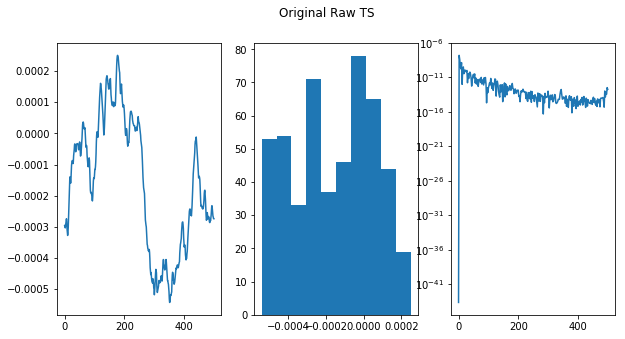

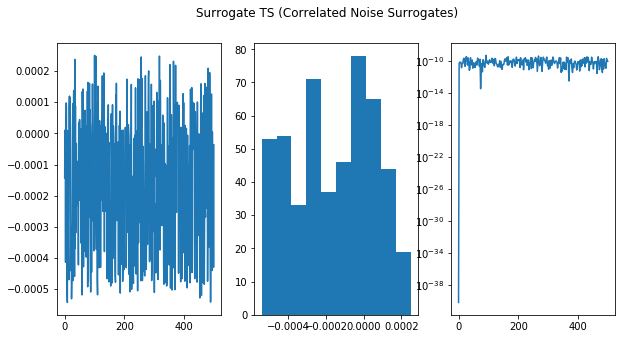

In [39]:
# here
fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(ts)
ax = axs[1]
ax.hist(ts)
ax = axs[2]
ax.semilogy(ts_per[0], ts_per[1])

fig.suptitle("Original Raw TS")

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(surrogates)
ax = axs[1]
ax.hist(surrogates)
ax = axs[2]
ax.semilogy(newts_per[0],  newts_per[1])

fig.suptitle("Surrogate TS (White Noise Shuffled)")

## AAFT

In [40]:
original_ts = timeseries.surrogates.Surrogates(ts[np.newaxis,:])
print(original_ts.original_data.shape)
surrogates = original_ts.AAFT_surrogates(original_ts.original_data).squeeze()

ts_per = scipy.signal.periodogram(ts.squeeze(), fs=1000)
newts_per = scipy.signal.periodogram(surrogates, fs=1000)
# print(testfreq.shape, testpow.shape)

Generated an instance of the Surrogates class.
(1, 500)
Generating correlated noise surrogates...


Text(0.5,0.98,'Surrogate TS (AAFT)')

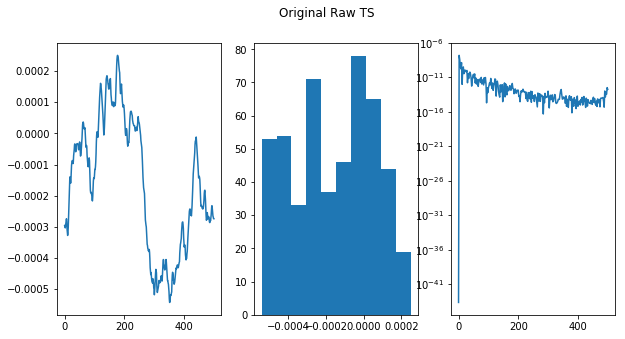

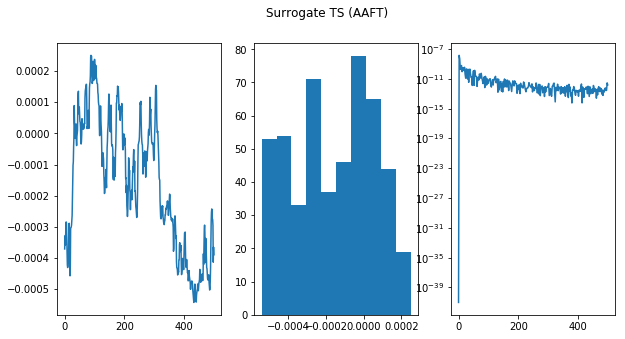

In [41]:
# here
fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(ts)
ax = axs[1]
ax.hist(ts)
ax = axs[2]
ax.semilogy(ts_per[0], ts_per[1])

fig.suptitle("Original Raw TS")

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(surrogates)
ax = axs[1]
ax.hist(surrogates)
ax = axs[2]
ax.semilogy(newts_per[0],  newts_per[1])

fig.suptitle("Surrogate TS (AAFT)")

## IAAFT

In [44]:
original_ts = timeseries.surrogates.Surrogates(ts[np.newaxis,:])
print(original_ts.original_data.shape)
surrogates = original_ts.refined_AAFT_surrogates(original_ts.original_data,
                                                n_iterations=5,
                                                output='true_amplitudes').squeeze()

ts_per = scipy.signal.periodogram(ts.squeeze(), fs=1000)
newts_per = scipy.signal.periodogram(surrogates, fs=1000)
# print(testfreq.shape, testpow.shape)

Generated an instance of the Surrogates class.
(1, 500)
Generating correlated noise surrogates...


Text(0.5,0.98,'Surrogate TS (White Noise Shuffled)')

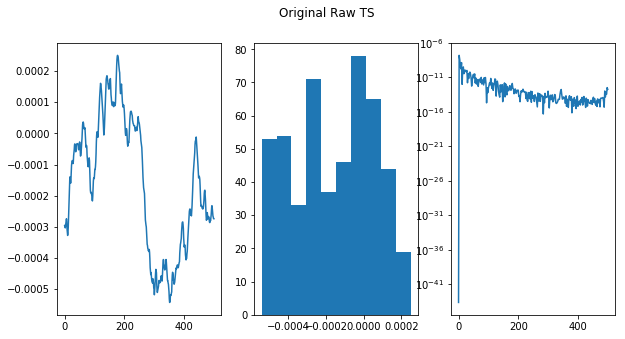

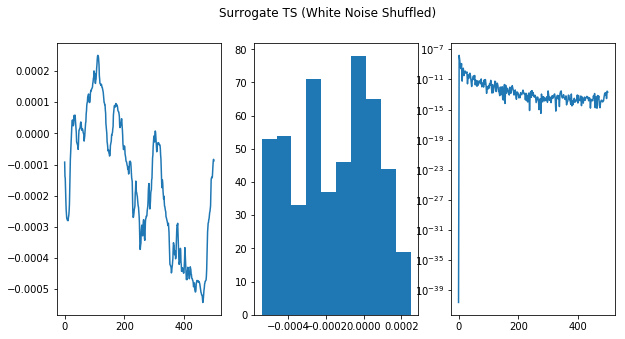

In [45]:
# here
fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(ts)
ax = axs[1]
ax.hist(ts)
ax = axs[2]
ax.semilogy(ts_per[0], ts_per[1])

fig.suptitle("Original Raw TS")

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(surrogates)
ax = axs[1]
ax.hist(surrogates)
ax = axs[2]
ax.semilogy(newts_per[0],  newts_per[1])

fig.suptitle("Surrogate TS (White Noise Shuffled)")

# Generate Surrogate Time Series for Single Channel

In [12]:
ts = rawdata[0,:500]
print(ts.shape, len(ts))

(500,) 500


In [13]:
omegas = np.random.uniform(0, np.pi, int(len(ts)/2+1))*1.0j

print(omegas.shape)

(251,)


In [14]:
ts_fourier  = np.fft.rfft(ts)
random_phases = np.exp(omegas)
ts_fourier_new = ts_fourier*random_phases
new_ts = np.fft.irfft(ts_fourier_new)

In [21]:
ts_per = scipy.signal.periodogram(ts, fs=1000)
newts_per = scipy.signal.periodogram(new_ts, fs=1000)
# print(testfreq.shape, testpow.shape)

## Plot Surrogate and Raw Data

- histogram of values (distribution)
- power spectrum of time series (frequency characteristics)
- statistics (average, std, median)

Text(0.5, 0.98, 'Surrogate TS (Shuffled Phases)')

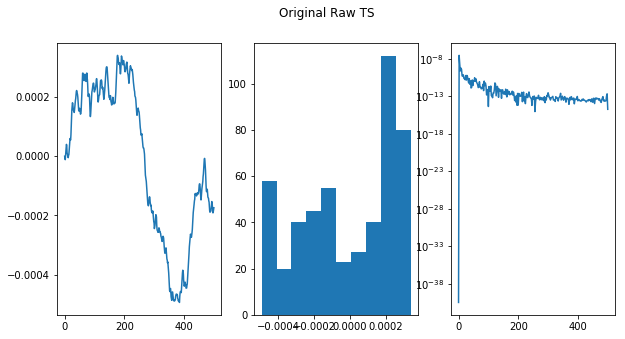

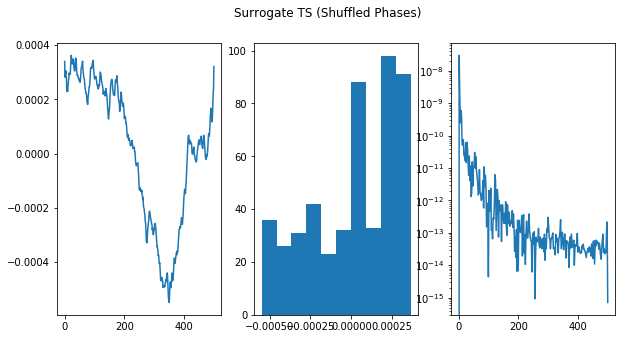

In [28]:
# here
fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(ts)
ax = axs[1]
ax.hist(ts)
ax = axs[2]
ax.semilogy(ts_per[0], ts_per[1])

fig.suptitle("Original Raw TS")

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs[0]
ax.plot(new_ts)
ax = axs[1]
ax.hist(new_ts)
ax = axs[2]
ax.semilogy(newts_per[0],  newts_per[1])

fig.suptitle("Surrogate TS (Correlated Noise Surrogates)")